# Полиномиальная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

Эта функция генерирует n узлов в интервале от -1 до 1, используя функцию f и шум (к значениям ординат мы прибавляет случайную величину со стандартным нормальным распределением).

In [2]:
def generate_dataset(f, n=50):
    x_nodes = np.linspace(-1., 1., 50)
    sigma = 0.5
    y_nodes = np.array([sigma * np.random.randn() + f(x) for x in x_nodes])
    return x_nodes, y_nodes

Эта функция вычисляет сумму квадратов, которую мы минимизируем. Коротко мы называем ее RSS = residual sum of squares

In [3]:
def rss(X, y, a):
    residual = y - X @ a
    return np.dot(residual, residual)

Эта функция выводит на экран одновременно исходную функцию, сгенерированные узлы и кривую, полученную в результате полиномиальной регрессии. 

In [4]:
def plot_regression(ax, f, x_nodes, y_nodes, fitting=None):
    x_for_plotting = np.linspace(-1., 1., 200)
    ax.plot(x_for_plotting, f(x_for_plotting), 'r', label=r'$\tilde f(x)$', linewidth=2)
    if fitting is not None:
        ax.plot(x_for_plotting, fitting(x_for_plotting), 'g', label='$f(x)$', linewidth=2)
    ax.plot(x_nodes, y_nodes, 'bo', label=r'$y_i$', markersize=8, alpha=0.3)
    ax.set_xlabel(r'$x$', fontsize=16)
    ax.set_ylabel(r'$y$', fontsize=16)
    ax.legend(loc='lower right', fontsize=16)
    ax.grid()


Сгенерируем обучающую выборку и выведем на экран ее вместе с исходной функцией.

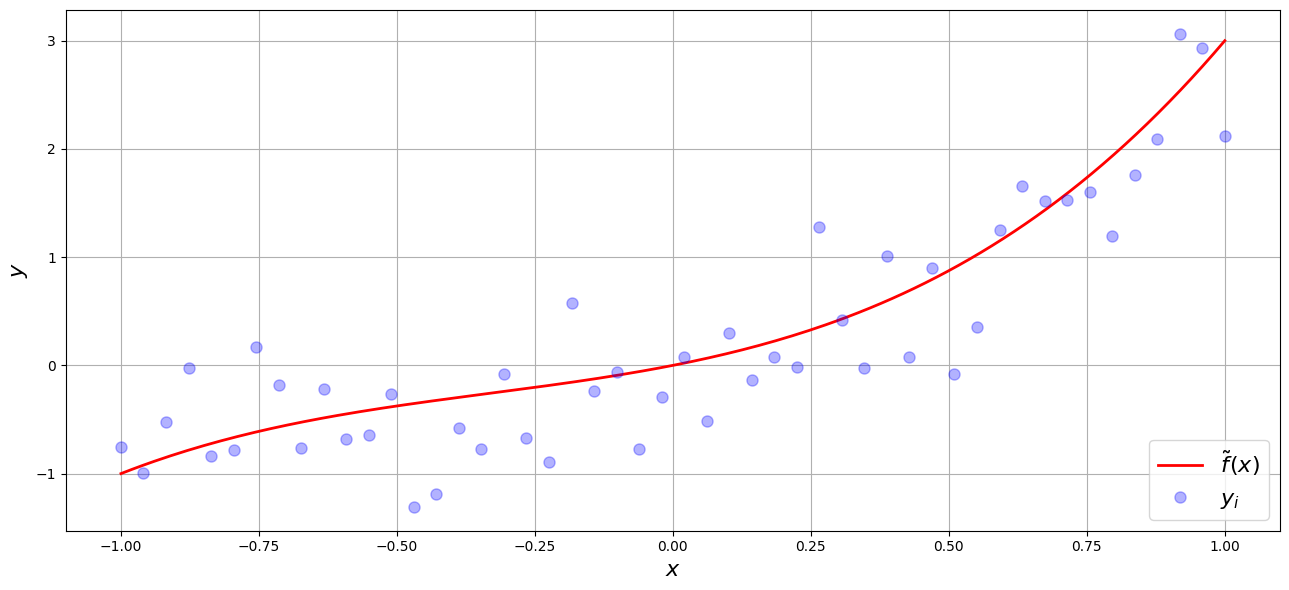

In [5]:
np.random.seed(seed=42)
f = lambda x: x**3 + x**2 + x
x_nodes, y_nodes = generate_dataset(f, n=50)
x_nodes = np.linspace(-1., 1., 50)
x_for_plotting = np.linspace(-1., 1., 200)

fig, ax = plt.subplots(figsize=(13, 6))
plot_regression(ax, f, x_nodes, y_nodes)
plt.tight_layout()
plt.show()


Выполним полиномиальную регрессию для степеней 1, 3, 7 и 15 и построим соответствующие графики. Обратите внимание на большие значения коэффициентов при больших n.

**Задание**: Допишите функцию линейной регрессии, используя только numpy. Используйте нормальное уравнение.

Степень полинома = 1, RSS (сумма квадратов разностей) = 17.54171895126698


<IPython.core.display.Math object>



Степень полинома = 3, RSS (сумма квадратов разностей) = 9.566150640024935


<IPython.core.display.Math object>



Степень полинома = 7, RSS (сумма квадратов разностей) = 8.787739471482473


<IPython.core.display.Math object>



Степень полинома = 15, RSS (сумма квадратов разностей) = 6.295521021730087


<IPython.core.display.Math object>

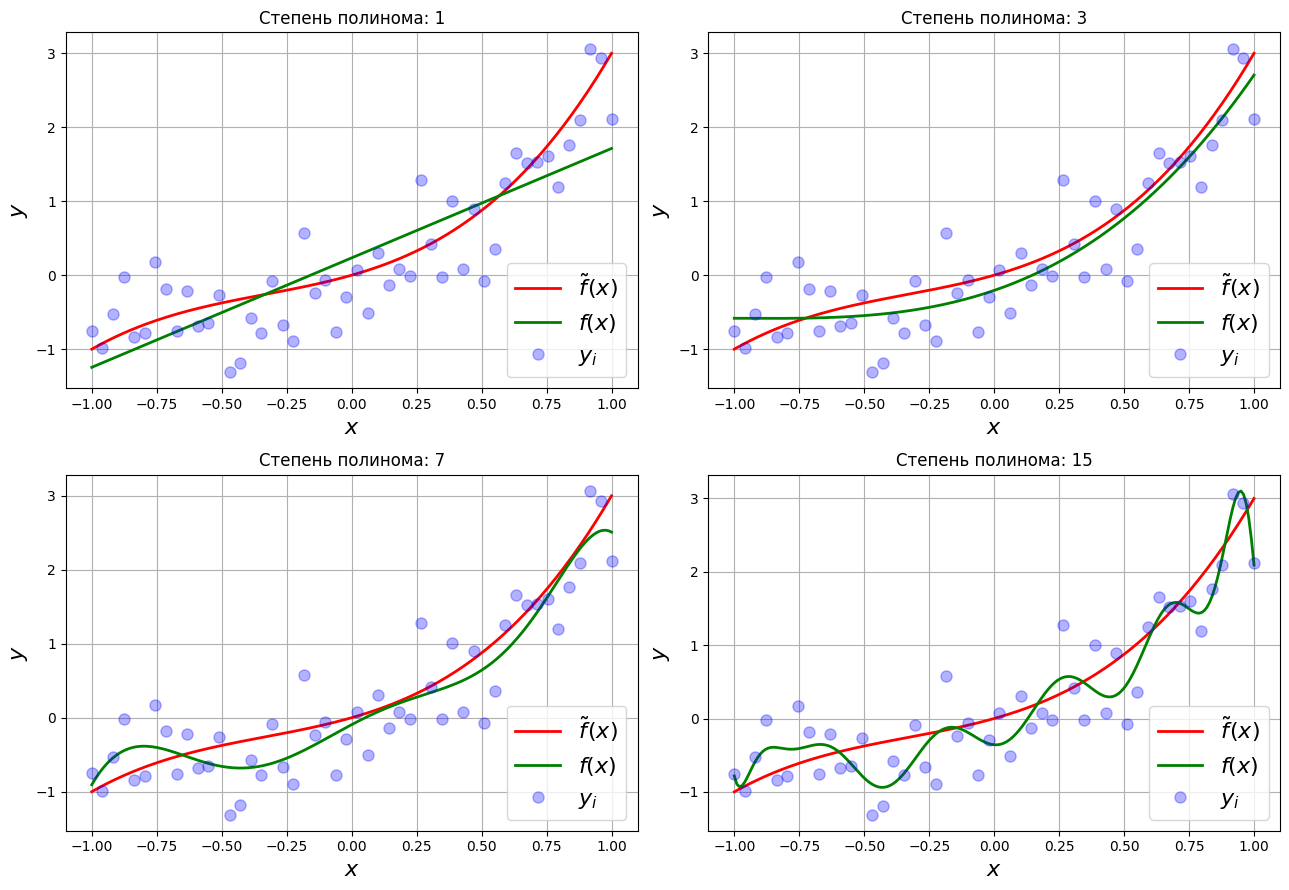

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 7, 15)):
    X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
    a = np.linalg.inv(X.T @ X) @ X.T @ y_nodes 
    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(X, y_nodes, a)}')
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
    print('\n')
    plot_regression(ax, f, x_nodes, y_nodes, 
                    fitting=lambda x: sum([a[i] * x**i for i in range(poly_degree + 1)]))
    ax.set_title(f'Степень полинома: {poly_degree}')
plt.tight_layout()
plt.show()


**Задание**: Проделйте то же самое, но используя LinearRegression из Sklearn.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 7, 15)):
    pipe = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('estimator', LinearRegression())
    ])
    a = pipe.fit(x_nodes.reshape(-1,1), y_nodes).predict(x_nodes.reshape(-1,1))
    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(x_nodes, y_nodes, a)}')
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
    print('\n')
    plot_regression(ax, f, x_nodes, y_nodes, 
                    fitting=lambda x: pipe.predict(x.reshape(-1,1)))
    ax.set_title(f'Степень полинома: {poly_degree}')
plt.tight_layout()
plt.show()


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

Воспользуемся $L_2$-регуляризацией. Для примера возьмем $\lambda = 0.1$. Используем буквально тем же кодом, но добавим теперь регуляризацию. Обратите внимание на то, что амплитуда коэффициентов резко снизилась

**Задание**: Допишите функцию линейной регрессии c L2-регуляризацией, используя только numpy. Используйте нормальное уравнение.

Степень полинома = 1


<IPython.core.display.Math object>



Степень полинома = 3


<IPython.core.display.Math object>



Степень полинома = 7


<IPython.core.display.Math object>



Степень полинома = 15


<IPython.core.display.Math object>

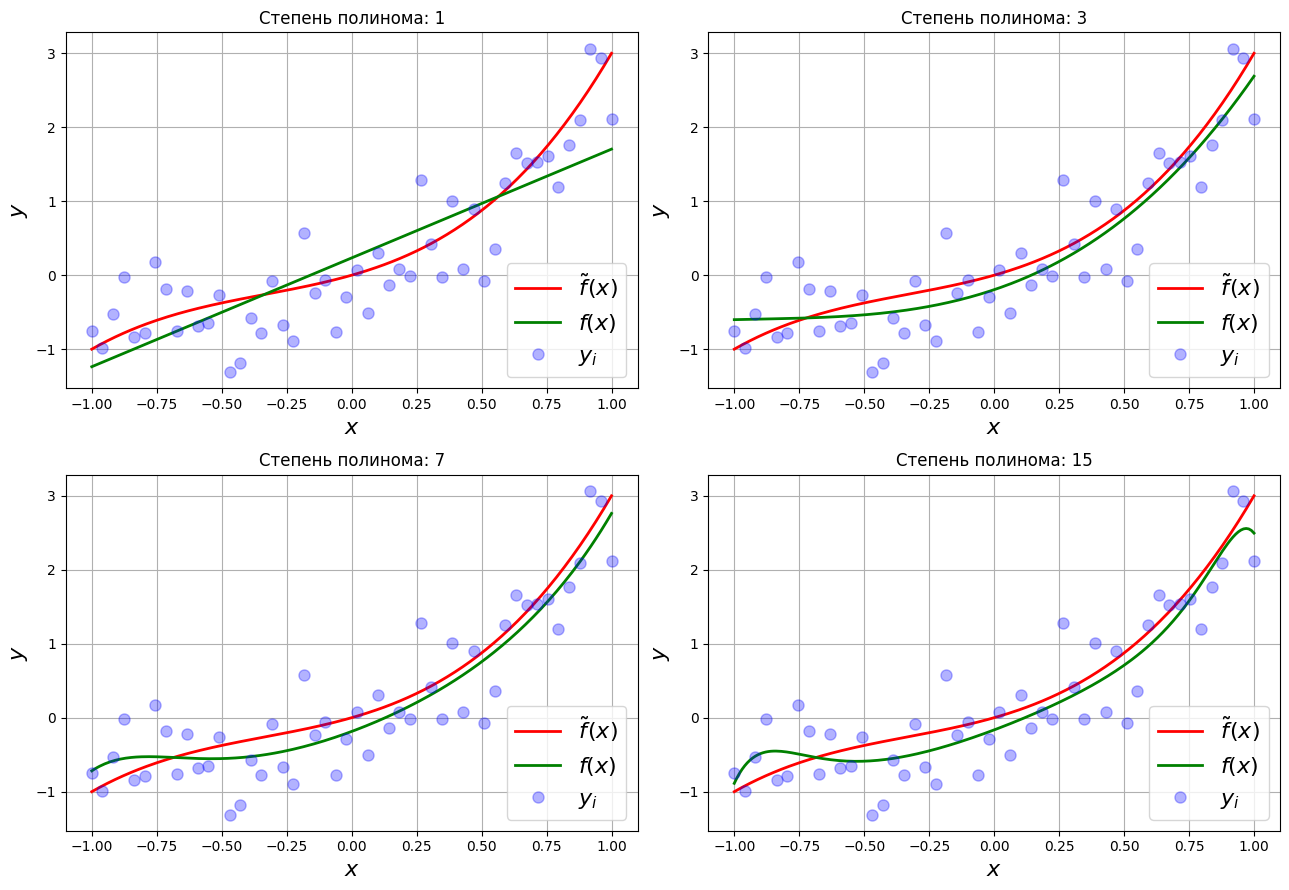

In [10]:
lambda_ = 0.1
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 7, 15)):
    X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
    a = np.linalg.inv(X.T @ X + lambda_*np.identity(poly_degree+1)) @ X.T @ y_nodes
    print(f'Степень полинома = {poly_degree}')
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
    print('\n')
    plot_regression(ax, f, x_nodes, y_nodes, 
                    fitting=lambda x: sum([a[i] * x**i for i in range(poly_degree + 1)]))
    ax.set_title(f'Степень полинома: {poly_degree}')
plt.tight_layout()
plt.show()


Для того, чтобы определить оптимальное значение гиперпараметра $\lambda$, сгенерирует тестовую выборку (правильнее ее называть validation set).

In [12]:
x_nodes_for_validation, y_nodes_for_validation = generate_dataset(f, n=50)
X_for_validation = np.vander(x_nodes_for_validation, N=poly_degree+1, increasing=True)

Для степени 15 выведем на экран зависимость оптимальной суммы квадратов от $\lambda$. Минимизирующее значение $\lambda$ является оптимальным.

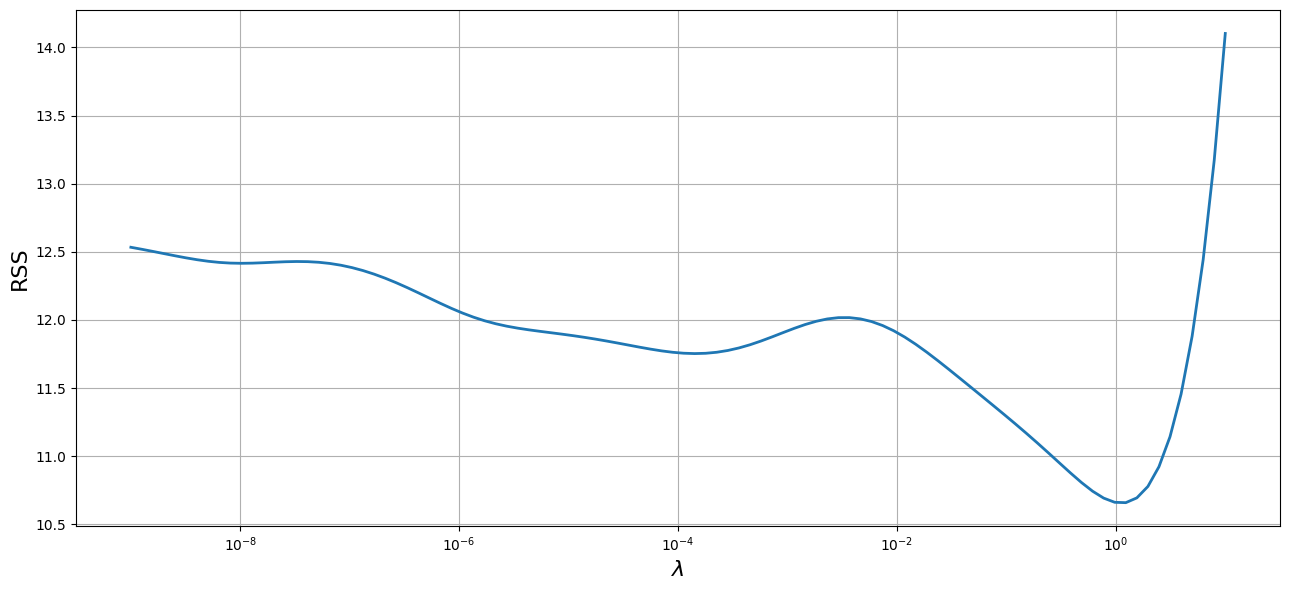

In [13]:
X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
poly_degree = 15
lambda_values = np.logspace(-9, 1, 100)
rss_values = np.zeros_like(lambda_values)
for i, lambda_ in enumerate(lambda_values):
    a = np.linalg.inv(X.T @ X + lambda_*np.identity(poly_degree+1)) @ X.T @ y_nodes
    rss_values[i] = rss(X_for_validation, y_nodes_for_validation, a)
fig, ax = plt.subplots(figsize=(13, 6))
ax.semilogx(lambda_values, rss_values, linewidth=2)
ax.set_xlabel(r'$\lambda$', fontsize=16)
ax.set_ylabel('RSS', fontsize=16)
ax.grid()
plt.tight_layout()
plt.show()

**Задание**: Допишите функцию линейной регрессии c L2-регуляризацией, но используя Sklearn. Используйте класс Ridge.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for ax, poly_degree in zip(axes.reshape(-1), (1, 3, 7, 15)):
    pipe = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('estimator', Ridge())
    ])
    a = pipe.fit(x_nodes.reshape(-1,1), y_nodes).predict(x_nodes.reshape(-1,1))
    print(f'Степень полинома = {poly_degree}, RSS (сумма квадратов разностей) = {rss(x_nodes, y_nodes, a)}')
    display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
    print('\n')
    plot_regression(ax, f, x_nodes, y_nodes, 
                    fitting=lambda x: pipe.predict(x.reshape(-1,1)))
    ax.set_title(f'Степень полинома: {poly_degree}')
plt.tight_layout()
plt.show()


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

Продемонстрируем теперь эффект от $L_1$-регуляризации. Ее особенность состоит в том, что она приводит к занулению как можно большего количества коэффициентов.

Так как сама задача минимизации уже не решается аналитически, мы воспользуемся пакетом scikit-learn.

In [7]:
from sklearn import linear_model

poly_degree = 15
X = np.vander(x_nodes, N=poly_degree+1, increasing=True)
clf = linear_model.Lasso(alpha=0.03)
clf.fit(X, y_nodes)
a = clf.coef_
print(f'Степень полинома = {poly_degree}')
display(Math(r'f(x) = ' + '+'.join(['{:.4f}'.format(coeff) + monomial for monomial, coeff in zip(['', 'x'] + [r'x^{' + str(i) + '}' for i in range(2, poly_degree+1)], a)])))
print('\n')
fig, ax = plt.subplots(figsize=(13, 6))
plot_regression(ax, f, x_nodes, y_nodes, 
                fitting=lambda x: sum([a[i] * x**i for i in range(poly_degree + 1)]))
plt.show()

KeyboardInterrupt: 